Preprocessing the data & Analysis
Dataset: VRRP

Source of the dataset: !!!! Don't forget to add !!!

# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Importing the Data


First, we load the data that was extracted by the Python script in GNS3.

In [3]:
df = pd.read_csv("./VRRP_13_500.csv")
df.head(3) # checking the first 3 row of our dataset

,Experiment,Date,Ping_Target,Tracked_Interface,Fail_Start_Time,Fail_End_Time,Failover_Duration_sec,Ping_Loss_Duration_sec,Total_Pings,Successful_Pings,...,Packet_Loss_Percent,Avg_Latency_ms,Min_Latency_ms,Max_Latency_ms,CPU_Before,CPU_After,Jitter_ms,Median_Latency_ms,Latency_95th_ms,Latency_99th_ms
0,1,2025-12-12 14:02:25,1.1.1.1,GigabitEthernet0/0,2.252,5.290,3.0372,3.0372,122,119,...,2.459016,8.096671,3.867626,27.334929,3.0,13.0,3.696,7.200,13.278,24.083
1,2,2025-12-12 14:02:49,1.1.1.1,GigabitEthernet0/0,2.294,6.342,4.0478,4.0478,129,125,...,3.100775,7.656477,4.518509,25.277853,2.0,11.0,2.592,7.017,12.432,14.026
2,3,2025-12-12 14:03:13,1.1.1.1,GigabitEthernet0/0,2.268,6.315,4.0476,4.0476,125,121,...,3.200000,7.942720,3.809214,28.526068,1.0,15.0,2.725,7.535,12.703,14.204


For better understanding, each feature type will be examined.

In [4]:
df.info()   # Check column types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Experiment              500 non-null    int64  
 1   Date                    500 non-null    object 
 2   Ping_Target             500 non-null    object 
 3   Tracked_Interface       500 non-null    object 
 4   Fail_Start_Time         500 non-null    float64
 5   Fail_End_Time           500 non-null    float64
 6   Failover_Duration_sec   500 non-null    float64
 7   Ping_Loss_Duration_sec  500 non-null    float64
 8   Total_Pings             500 non-null    int64  
 9   Successful_Pings        500 non-null    int64  
 10  Lost_Pings              500 non-null    int64  
 11  Packet_Loss_Percent     500 non-null    float64
 12  Avg_Latency_ms          500 non-null    float64
 13  Min_Latency_ms          500 non-null    float64
 14  Max_Latency_ms          500 non-null    fl

Finding out the number of nulls.

In [5]:
df.isna().sum() # Count missing values in each column

Experiment                0
Date                      0
Ping_Target               0
Tracked_Interface         0
Fail_Start_Time           0
Fail_End_Time             0
Failover_Duration_sec     0
Ping_Loss_Duration_sec    0
Total_Pings               0
Successful_Pings          0
Lost_Pings                0
Packet_Loss_Percent       0
Avg_Latency_ms            0
Min_Latency_ms            0
Max_Latency_ms            0
CPU_Before                0
CPU_After                 4
Jitter_ms                 0
Median_Latency_ms         0
Latency_95th_ms           0
Latency_99th_ms           0
dtype: int64

In [6]:
# Show all columns in console
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df.describe(include='all') # Summary statistics for numeric columns

,Experiment,Date,Ping_Target,Tracked_Interface,Fail_Start_Time,Fail_End_Time,Failover_Duration_sec,Ping_Loss_Duration_sec,Total_Pings,Successful_Pings,Lost_Pings,Packet_Loss_Percent,Avg_Latency_ms,Min_Latency_ms,Max_Latency_ms,CPU_Before,CPU_After,Jitter_ms,Median_Latency_ms,Latency_95th_ms,Latency_99th_ms
count,500.000000,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,496.000000,500.000000,500.000000,500.000000,500.000000
unique,NaN,500,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2025-12-12 14:02:25,1.1.1.1,GigabitEthernet0/0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,500,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,250.500000,NaN,NaN,NaN,2.276368,6.042030,3.765640,3.765640,127.870000,124.150000,3.720000,2.910918,7.608031,4.430004,20.122527,2.452000,10.887097,2.421338,7.097500,11.663070,15.482464
std,144.481833,NaN,NaN,NaN,0.047684,0.454302,0.454963,0.454963,4.456998,4.412532,0.449449,0.352831,0.590587,0.417792,8.979891,1.347341,2.591235,1.244304,0.316321,3.452403,5.613590
min,1.000000,NaN,NaN,NaN,2.209000,5.248000,3.035000,3.035000,112.000000,109.000000,3.000000,2.127660,6.371303,3.187895,10.039091,1.000000,5.000000,0.914000,6.200000,7.653000,8.237000
25%,125.750000,NaN,NaN,NaN,2.244000,5.359000,3.037675,3.037675,125.000000,121.000000,3.000000,2.500000,7.184794,4.176497,13.193905,2.000000,9.000000,1.458000,6.889250,9.542000,11.067750
50%,250.500000,NaN,NaN,NaN,2.269000,6.296000,4.048300,4.048300,128.000000,125.000000,4.000000,3.053435,7.504217,4.442334,17.256141,2.000000,11.000000,1.939500,7.079500,10.316000,13.097000
75%,375.250000,NaN,NaN,NaN,2.298000,6.331250,4.049100,4.049100,131.000000,127.000000,4.000000,3.149606,7.948668,4.704058,25.308549,3.000000,13.000000,3.126500,7.303250,12.427500,20.349000


# Data Cleaning

### Handling Missing Values in CPU Metrics

In the first stage, we observed some null values, which we will handle first.

In [7]:
df["CPU_After"].value_counts() # Finding the most frequent values

CPU_After
10.0    77
8.0     64
9.0     61
13.0    58
14.0    54
12.0    50
11.0    49
15.0    29
7.0     27
6.0     12
16.0     9
17.0     3
5.0      2
19.0     1
Name: count, dtype: int64

10 is the medien so the null values will be filled up with 10.

In [8]:
df["CPU_After"] = df["CPU_After"].fillna(df["CPU_After"].mode()[0])
df["CPU_After"].isnull().sum() # checking the data again

np.int64(0)

In [9]:
df.isna().sum()

Experiment                0
Date                      0
Ping_Target               0
Tracked_Interface         0
Fail_Start_Time           0
Fail_End_Time             0
Failover_Duration_sec     0
Ping_Loss_Duration_sec    0
Total_Pings               0
Successful_Pings          0
Lost_Pings                0
Packet_Loss_Percent       0
Avg_Latency_ms            0
Min_Latency_ms            0
Max_Latency_ms            0
CPU_Before                0
CPU_After                 0
Jitter_ms                 0
Median_Latency_ms         0
Latency_95th_ms           0
Latency_99th_ms           0
dtype: int64

### Detecting Unusual Values in Failover Metrics

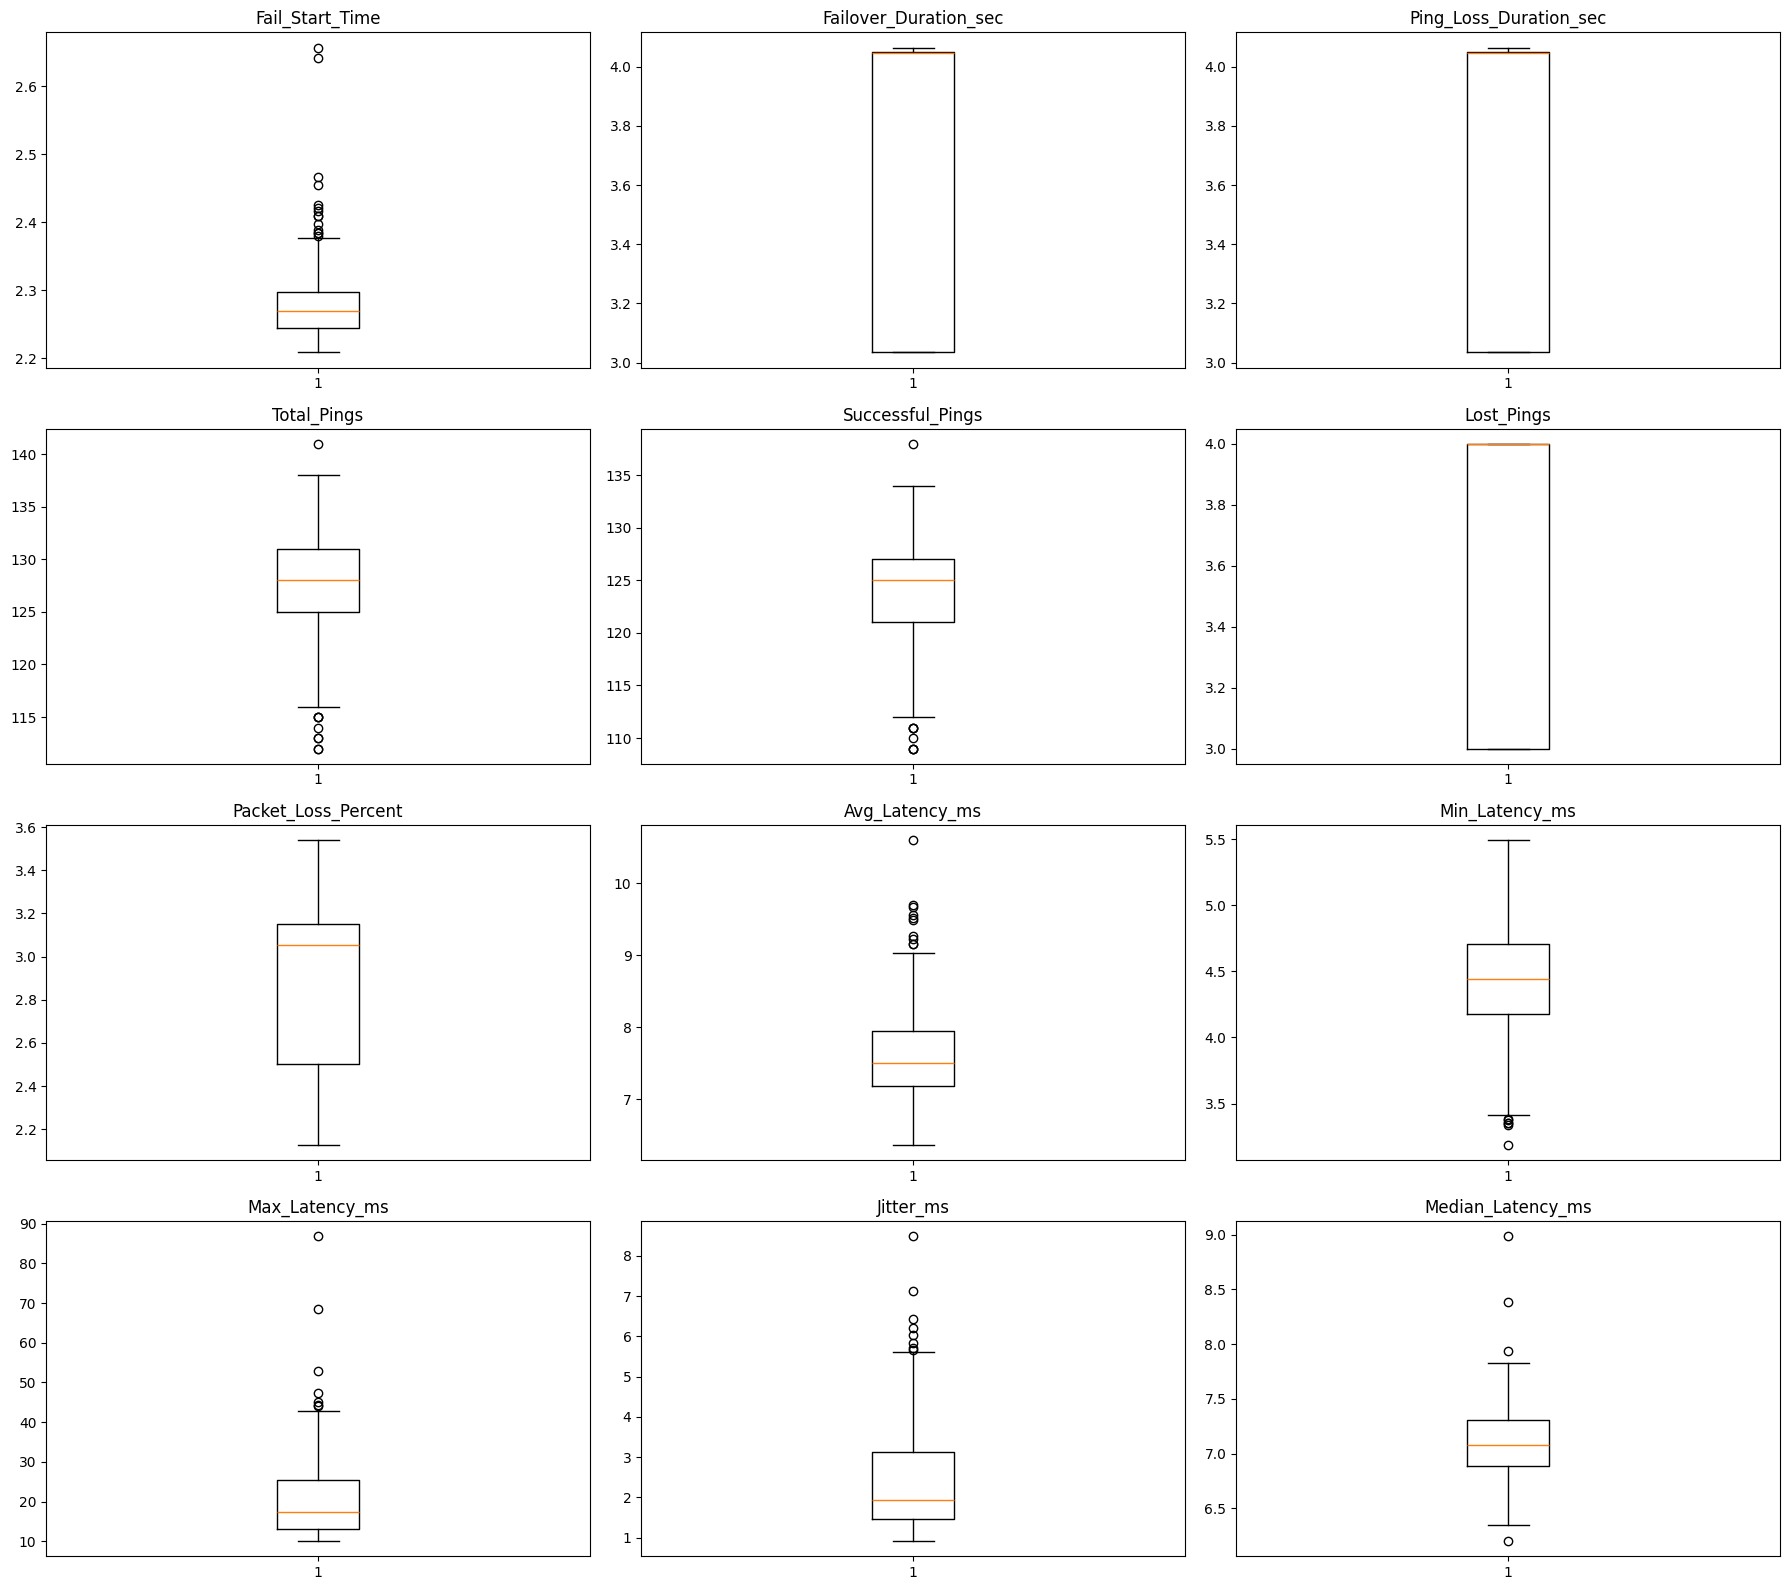

In [10]:
# Selecting the target columns for outlier detection
cols_to_clean = [
    "Fail_Start_Time" ,"Failover_Duration_sec", "Ping_Loss_Duration_sec",
    "Total_Pings", "Successful_Pings",
    "Lost_Pings", "Packet_Loss_Percent", "Avg_Latency_ms", "Min_Latency_ms",
    "Max_Latency_ms", "Jitter_ms",
    "Median_Latency_ms",
]

# Decide rows/cols for grid layout
n = len(cols_to_clean)
rows = math.ceil(n / 3)   # 3 plots per row
cols_per_row = 3

plt.figure(figsize=(18, rows * 4))

for i, col in enumerate(cols_to_clean, 1):
    plt.subplot(rows, cols_per_row, i)
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

The failover should be consistent, as it is triggered automatically by a Python script at the start of the experiment. It should not be influenced by any external factors, and as observed in the box plot, these values clearly deviate from the expected behavior. Therefore, they can be confirmed as outliers and removed from the dataset.

In [11]:
df["Fail_Start_Time"].value_counts().sort_index(ascending=False)

Fail_Start_Time
2.657    1
2.642    1
2.467    1
2.455    1
2.426    1
        ..
2.213    1
2.212    1
2.211    2
2.210    1
2.209    1
Name: count, Length: 154, dtype: int64

In [12]:
# Calculate Q1, Q3, and IQR
Q1 = df["Fail_Start_Time"].quantile(0.25) 
Q3 = df["Fail_Start_Time"].quantile(0.75) 
IQR = Q3 - Q1 

# Define bounds
lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR 

# Filter out outliers 
df = df[(df["Fail_Start_Time"] >= lower) & (df["Fail_Start_Time"] <= upper)] 

# Reset index after filtering 
df.reset_index(drop=True, inplace=True)

In [13]:
df.shape

(486, 21)

Removing the outliers from latency

In [14]:
df["Avg_Latency_ms"].value_counts().sort_index()

Avg_Latency_ms
6.371303    1
6.463558    1
6.481680    1
6.536148    1
6.567531    1
           ..
9.496065    1
9.523884    1
9.561077    1
9.672276    1
9.704371    1
Name: count, Length: 486, dtype: int64

In [15]:
# Calculate Q1, Q3, and IQR
Q1 = df["Avg_Latency_ms"].quantile(0.25) 
Q3 = df["Avg_Latency_ms"].quantile(0.75) 
IQR = Q3 - Q1 

# Define bounds
lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR 

# Filter out outliers 
df = df[(df["Avg_Latency_ms"] >= lower) & (df["Avg_Latency_ms"] <= upper)] 

# Reset index after filtering 
df.reset_index(drop=True, inplace=True)

In [16]:
df.shape

(477, 21)

In [17]:
# Calculate Q1, Q3, and IQR
Q1 = df["Max_Latency_ms"].quantile(0.25) 
Q3 = df["Max_Latency_ms"].quantile(0.75) 
IQR = Q3 - Q1 

# Define bounds
lower = Q1 - 1.5 * IQR 
upper = Q3 + 1.5 * IQR 

# Filter out outliers 
df = df[(df["Max_Latency_ms"] >= lower) & (df["Max_Latency_ms"] <= upper)] 

# Reset index after filtering 
df.reset_index(drop=True, inplace=True)

In [22]:
df.shape

(473, 21)

# Failover Performance

### Average Failover Duration

Now that the data is clean, we can analyze it to extract meaningful insights.

C:\Users\arian\AppData\Local\Temp\ipykernel_32604\202349738.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


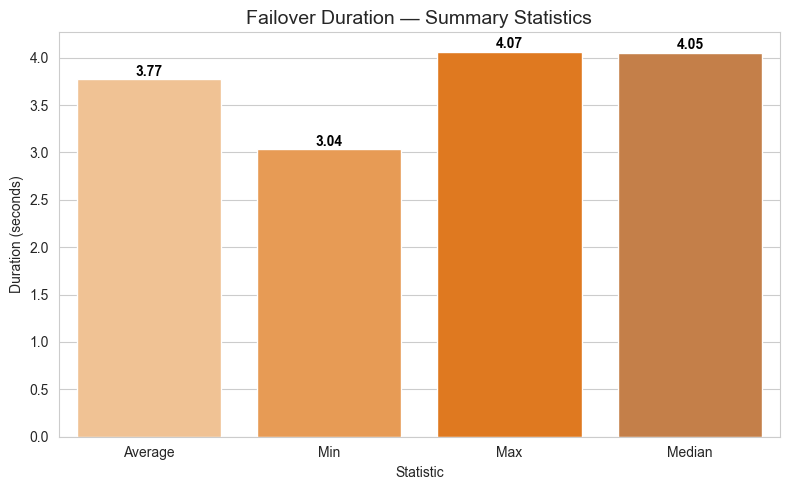

In [19]:
# Calculate statistics
avg = df["Failover_Duration_sec"].mean()
min_val = df["Failover_Duration_sec"].min()
max_val = df["Failover_Duration_sec"].max()
median = df["Failover_Duration_sec"].median()

stats = {
    "Average": avg,
    "Min": min_val,
    "Max": max_val,
    "Median": median
}

# Create dataframe for seaborn
stats_df = pd.DataFrame({
    "Statistic": list(stats.keys()),
    "Value": list(stats.values())
})

colors = [
    "#FFC285",  # light pastel orange
    "#FF9A3D",  # medium soft orange
    "#FF7700",  # main professional orange
    "#D87C35"   # deep strong orange
]

# Plot
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=stats_df,
    x="Statistic",
    y="Value",
    palette=colors
)

# Add values on top of the bars
for i, v in enumerate(stats_df["Value"]):
    ax.text(i, v + (v * 0.01), f"{v:.2f}",
            ha='center', fontweight='bold', color="#000000")

plt.title("Failover Duration — Summary Statistics", fontsize=14)
plt.ylabel("Duration (seconds)")
plt.xlabel("Statistic")
plt.tight_layout()
plt.show()


### Packet Loss analysis

C:\Users\arian\AppData\Local\Temp\ipykernel_32604\2939193927.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


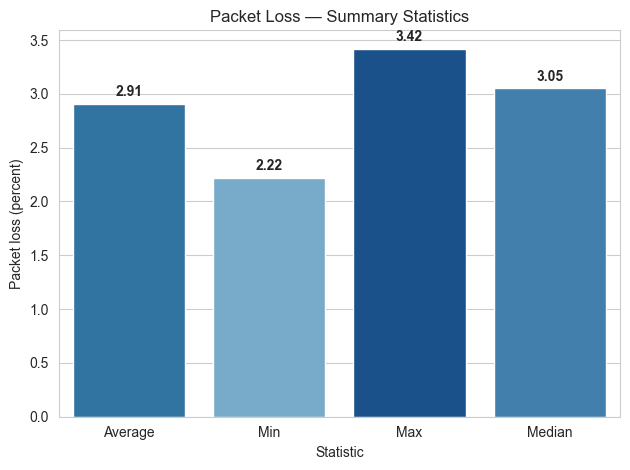

In [20]:
# Calculate statistics
avg = df["Packet_Loss_Percent"].mean()
min_val = df["Packet_Loss_Percent"].min()
max_val = df["Packet_Loss_Percent"].max()
median = df["Packet_Loss_Percent"].median()

stats = {
    "Average": avg,
    "Min": min_val,
    "Max": max_val,
    "Median": median
}

# Create dataframe
stats_df = pd.DataFrame({
    "Statistic": list(stats.keys()),
    "Value": list(stats.values())
})

colors = [
    "#1F77B4",  
    "#6BAED6",  
    "#08519C",  
    "#3182BD"
]

ax = sns.barplot(
    data=stats_df,
    x="Statistic",
    y="Value",
    palette=colors  
)

# Add value labels on top of each bar
for i, v in enumerate(stats_df["Value"]):
    offset = max(stats_df["Value"]) * 0.02
    ax.text(i, v + offset, f"{v:.2f}", ha='center', fontweight='bold')

plt.title("Packet Loss — Summary Statistics")
plt.ylabel("Packet loss (percent)")
plt.xlabel("Statistic")
plt.tight_layout()
plt.show()


### CPU Performance

C:\Users\arian\AppData\Local\Temp\ipykernel_32604\572816446.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=stats_df, x="Statistic", y="Value", palette=colors)


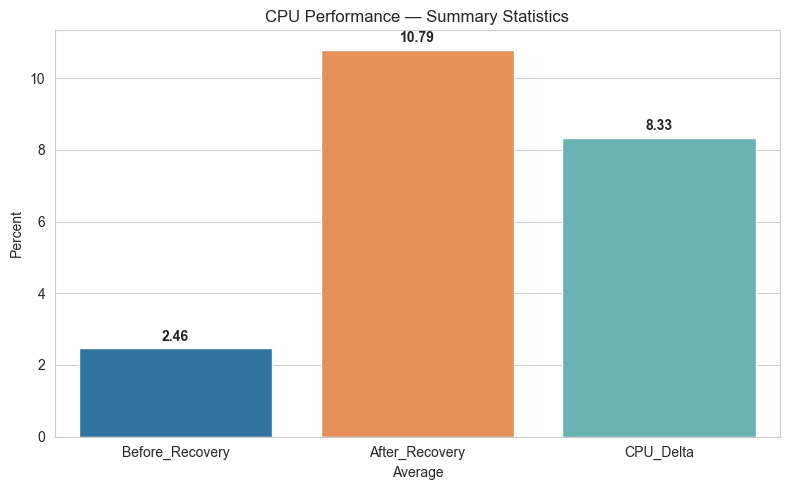

In [21]:
# Calculate statistics
ave_before = df["CPU_Before"].mean()
avg_after = df["CPU_After"].mean()
cpu_delta = (df["CPU_After"] - df["CPU_Before"]).mean()



stats = {
    "Before_Recovery": ave_before,
    "After_Recovery": avg_after,
    "CPU_Delta": cpu_delta,
}

# Create dataframe
stats_df = pd.DataFrame({
    "Statistic": list(stats.keys()),
    "Value": list(stats.values())
})
colors = ["#1F77B4", "#FF8C42", "#5BC0BE"]

# Plot
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

ax = sns.barplot(data=stats_df, x="Statistic", y="Value", palette=colors)

# Add value labels on top of each bar
for i, v in enumerate(stats_df["Value"]):
    offset = max(stats_df["Value"]) * 0.02
    ax.text(i, v + offset, f"{v:.2f}", ha='center', fontweight='bold')

plt.title("CPU Performance — Summary Statistics")
plt.ylabel("Percent")
plt.xlabel("Average")
plt.tight_layout()
plt.show()
